In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
#from mlp_functions import forward,derivative_w2,derivative_b2,derivative_w1,derivative_b1

In [3]:
def get_normalized_data():
    print("Reading in and transforming data...")
    
    
    df = pd.read_csv('C:/Users/TANNERU/Downloads/train.csv/train.csv')
    #print(df)
    data = df.values.astype(np.float32)
    #print(data)
    
    np.random.shuffle(data)
    
    
    X = data[:,1:] #except 1 columns
    Y = data[:,0].astype(np.int32) #only 1st column
    print("Innputs",X)
    print("output",Y)
    print(X.shape) #(42000, 784)
    print(Y.shape) #(42000,)
    
    
    Xtrain = X[:-1000]
    Xtest = X[-1000:]
    Ytrain = Y[:-1000]
    Ytest = Y[-1000:]
    print("Xtrain",Xtrain.shape)#(41000, 784)
    print("Xtest",Xtest.shape)#(1000, 784)
    print("Ytrain",Ytrain.shape)#(41000,)
    print("Ytest",Ytest.shape) #(1000,)
    
    
    mu = Xtrain.mean(axis = 0) #(784,)
    std = Xtrain.std(axis = 0) 
    np.place(std,std == 0,1) # changes all values to 0,1
    print(np.place(std,std == 0,1))
    #print(mu)
    print(mu.shape)#(784,)
    
    
    #center the data
    Xtrain = (Xtrain - mu)/std
    Xtest = (Xtest - mu)/std
    print(Xtrain)
    print(Xtest)
    
    
    return Xtrain,Xtest,Ytrain,Ytest
    
    

In [4]:
get_normalized_data()

Reading in and transforming data...
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [9 9 1 ... 5 0 3]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
None
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([9, 9, 1, ..., 9, 9, 8]),
 array([7, 3, 6, 9, 1, 7, 0, 8, 1, 9, 1, 4, 4, 6, 2, 5, 0, 8, 5, 4, 6, 1,
        3, 2, 1, 1, 5, 6, 1, 7, 3, 2, 1, 9, 9, 0, 7, 1, 5, 2, 3, 7, 7, 3,
        1, 1, 8, 6, 0, 4, 2, 5, 8, 2, 9, 3, 7, 6, 7, 5, 4, 4, 2, 0, 6, 4,
        9, 7, 4, 1, 7, 0, 9, 6, 1, 7, 3, 4, 5, 5, 8, 5, 9, 3, 3, 8, 0, 9,
        5, 3, 2, 0, 7, 9, 9, 7, 7, 8, 1, 0, 2, 7, 1, 7, 9, 8, 9, 2, 0, 8,
        1, 4, 6, 2, 8, 7, 4, 8, 0, 5, 7, 7, 6, 7, 1, 3, 2, 1, 8, 9, 4

In [5]:
def forward(X,W1,b1,W2,b2):
    #sigmoid hidden layer
    a = X.dot(W1)+b1
    Z = 1/(1+np.exp(-a))
    
    #relu for hidden layer
    #Z = X.dot(W1)+b1
    #Z[Z<0] = 0
    
    #softmax for output layer
    A = Z.dot(W2)+b2
    expA = np.exp(A)
    Y = expA/expA.sum(axis = 1 ,keepdims = True)
    return Y ,Z



def derivative_w2(Z,T,Y):
    return Z.T.dot(Y-T)

def derivative_b2(T,Y):
    return (Y-T).sum(axis = 0)


def derivative_w1(X,Z,T,Y,W2):
    # sigmoid
    dz = (Y-T).dot(W2.T)*(Z*(1-Z))
    return X.T.dot(dz)

    # relu
    #dz = (Y-T).dot(W2.T)*(Z>0)
    #return X.T.dot(dz)

def derivative_b1(Z,T,Y,W2):
    return ((Y-T).dot(W2.T)*(Z*(1-Z))).sum(axis = 0) # for sigmoid

    #return ((Y-T).dot(W2.T)*(Z>0)).sum(axis = 0) # for relu


In [6]:
def predict(p_y):
    return np.argmax(p_y,axis = 1)



def error_rate(p_y,t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def cost(p_y,t):
    tot = -t*np.log(p_y)
    return tot.sum()


def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N,10))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind

    

In [14]:
def main():
    # compare 3 scenarios:
    # 1. batch SGD
    # 2. batch SGD with momentum
    # 3. batch SGD with Nesterov momentum
    
    max_iter = 20
    print_period = 50
    
    
    Xtrain,Xtest,Ytrain,Ytest = get_normalized_data()
    
    print("Xtrain",Xtrain.shape)#(41000, 784)
    print("Xtest",Xtest.shape)#(1000, 784)
    print("Ytrain",Ytrain.shape)#(41000,)
    print("Ytest",Ytest.shape) #(1000,)
    
    lr = 0.00004
    reg = 0.01
    
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)
    print(Ytrain_ind.shape)#(41000, 10)
    print(Ytest_ind.shape)#(1000, 10)
    
    
    
    N,D = Xtrain.shape #(41000, 784)
    batch_sz = 500
    n_batches = N // 500 #82
    
    
    M = 300 # hidden units
    K = 10
    
    #initializing weights
    
    W1 = np.random.randn(D,M)/np.sqrt(D)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M,K)/np.sqrt(M)
    b2 = np.random.randn(K)
    
    
    W1_0 = W1.copy()
    b1_0 = b1.copy()
    W2_0 = W2.copy()
    b2_0 = b2.copy()
    
    
    #1.Batch
    print("------------batch----------")
    
    losses_batch =  []
    errors_batch = []
    
    for i in range(max_iter): #20
        for j in range(n_batches):#82
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz+batch_sz),] #500 to 1000,1000 to 1500,1500 t0 2000..........
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz+batch_sz),] #500 to 1000,1000 to 1500,1500 t0 2000..........
            pybatch,Z = forward(Xbatch,W1,b1,W2,b2)
            
            
            #gradients
            
            gw2 = derivative_w2(Z,Ybatch,pybatch)+reg*W2
            gb2 = derivative_b2(Ybatch,pybatch)+reg*b2
            gw1 = derivative_w1(Xbatch,Z,Ybatch,pybatch,W2) + reg*W1
            gb1 = derivative_b1(Z,Ybatch,pybatch,W2)+reg*b1
            
            
            W2-=lr*gw2
            b2-=lr*gb2
            W1-=lr*gw1
            b1-=lr*gb1
            
            
            if j % print_period == 0:
                py,_ = forward(Xtest,W1,b1,W2,b2)
                l = cost(py,Ytest_ind)
                losses_batch.append(l)
                print("i:",i,"j:",j,"cost:",l)
                
                err = error_rate(py,Ytest)
                errors_batch.append(err)
                print("error rate:",err)
                
    py,_ = forward(Xtest,W1,b1,W2,b2)
    print("final errora rate",error_rate(py,Ytest))
    
                
                
                
    #2 batch with momentum
    print("------------batch with momentum----------")
    
    W1_0 = W1.copy()
    b1_0 = b1.copy()
    W2_0 = W2.copy()
    b2_0 = b2.copy()
    
    
    losses_momentum = []
    errors_momentum = []
    
    
    mu = 0.9
    dW2 = 0
    db2 = 0
    dW1 = 0
    db1 = 0
    
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

            # gradients
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            
            
            
            #update velocities
            dW2 = mu*dW2 - lr*gW2
            db2 = mu*db2 - lr*gb2
            dW1 = mu*dW1 - lr*gW1
            db1 = mu*db1 - lr*gb1
            
            #updates
            W2 += dW2
            b2 += db2
            W1 += dW1
            b1 += db1
            
            
            if j % print_period == 0:
                py,_ = forward(Xtest,W1,b1,W2,b2)
                l = cost(py,Ytest_ind)
                losses_momentum.append(l)
                print("i:",i,"j:",j,"cost:",l)
                
                err = error_rate(py,Ytest)
                errors_momentum.append(err)
                print("error rate:",err)
                
    py,_ = forward(Xtest,W1,b1,W2,b2)
    print("final errora rate",error_rate(py,Ytest))
            
            
            
            
            
    #3 batch with nesteriv momentum
    print("------------batch with momentum----------")
    
    W1_0 = W1.copy()
    b1_0 = b1.copy()
    W2_0 = W2.copy()
    b2_0 = b2.copy()
    
    
    losses_nesterov = []
    errors_nesterov = []
    
    
    mu = 0.9
    vW2 = 0
    vb2 = 0
    vW1 = 0
    vb1 = 0
    
    
    for i in range(max_iter):
        for j in range(n_batches):
            Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
            Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]
            pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

            # gradients
            gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
            gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
            gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
            gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
            
            
            
            #update velocities
            vW2 = mu*vW2 - lr*gW2
            vb2 = mu*vb2 - lr*gb2
            vW1 = mu*vW1 - lr*gW1
            vb1 = mu*vb1 - lr*gb1
            
            
            
            #param updates
            W2 += mu*vW2 - lr*gW2
            b2 += mu*vb2 - lr*gb2
            W1 += mu*vW1 - lr*gW1
            b1 += mu*vb1 - lr*gb1
            
            
            if j % print_period == 0:
                py,_ = forward(Xtest,W1,b1,W2,b2)
                l = cost(py,Ytest_ind)
                losses_nesterov.append(l)
                print("i:",i,"j:",j,"cost:",l)
                
                err = error_rate(py,Ytest)
                errors_nesterov.append(err)
                print("error rate:",err)
                
    py,_ = forward(Xtest,W1,b1,W2,b2)
    print("final errora rate",error_rate(py,Ytest))
            
            
          
    plt.plot(losses_batch,label = "batch")
    plt.plot(losses_momentum,label = "momentum")
    plt.plot(losses_nesterov,label = "nesterov")
    plt.legend()
    plt.show()           
        
    
                
            
    
    
    
    
    
    
    
    


Reading in and transforming data...
Innputs [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
output [3 3 8 ... 8 9 4]
(42000, 784)
(42000,)
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
None
(784,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Xtrain (41000, 784)
Xtest (1000, 784)
Ytrain (41000,)
Ytest (1000,)
(41000, 10)
(1000, 10)
------------batch----------
i: 0 j: 0 cost: 2493.339137169524
error rate: 0.924
i: 0 j: 50 cost: 1945.4197222696753
error rate: 0.462
i: 1 j: 0 cost: 1745.189356627227
error rate: 0.342
i: 1 j: 50 cost: 1484.2679195292724
error rate: 0.279
i: 2 j: 0 cost: 1345.235828044

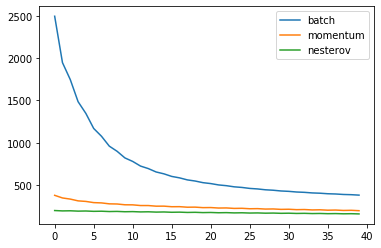

In [15]:
main()